### **Cleaning Data - New York City Airbnb Open Data**

Name: Vignesh.M

Domain: Data Analytics

Oasis Infobyte Virtual Internship Program

**Loading the Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/AB_NYC_2019.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# Identify columns with missing values

missing_values = df.isnull().sum()
missing_values

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Data Analysis**

In [7]:
# Calculate descriptive statistics for numerical features

key_numerical_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']

df[key_numerical_cols].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,112.781327
std,240.154170,20.510550,44.550582,1.680442,131.622289
min,0.000000,1.000000,0.000000,0.010000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,365.000000


In [8]:
# Analyze Unique values for Categorical features

categorical_cols = ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']
df[categorical_cols].nunique()

,0
name,47905
host_name,11452
neighbourhood_group,5
neighbourhood,221
room_type,3


In [9]:
# Analyze Unique values for Numerical features

df[key_numerical_cols].nunique()

,0
price,674
minimum_nights,109
number_of_reviews,394
reviews_per_month,937
availability_365,366


**Data Cleaning**

In [10]:
# Impute missing numerical values with the median

numerical_cols_with_missing_values = ['reviews_per_month']
for col in numerical_cols_with_missing_values:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

In [11]:
# Replace missing categorical values with "Missing"

categorical_cols_with_missing_values = ['name', 'host_name', 'last_review']
for col in categorical_cols_with_missing_values:
    df[col] = df[col].fillna("Missing")

**Data Visualisation**

**Correlation Heatmap**

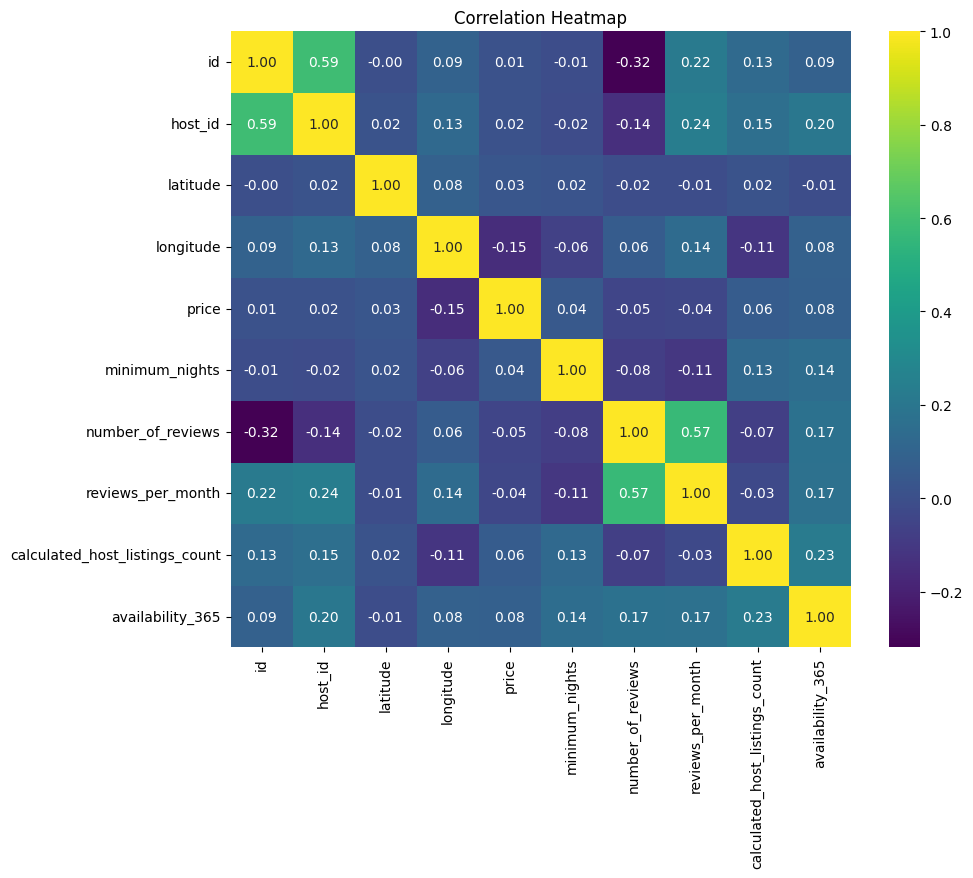

In [12]:
# Correlation Heatmap

numerical_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Count Plot**

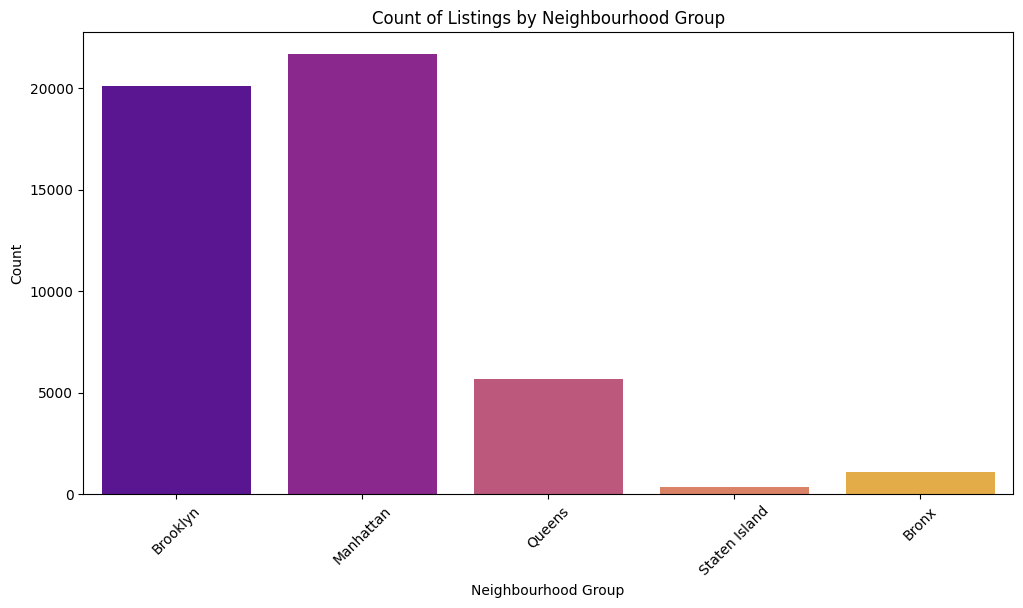

([0, 1, 2],
 [Text(0, 0, 'Private room'),
  Text(1, 0, 'Entire home/apt'),
  Text(2, 0, 'Shared room')])

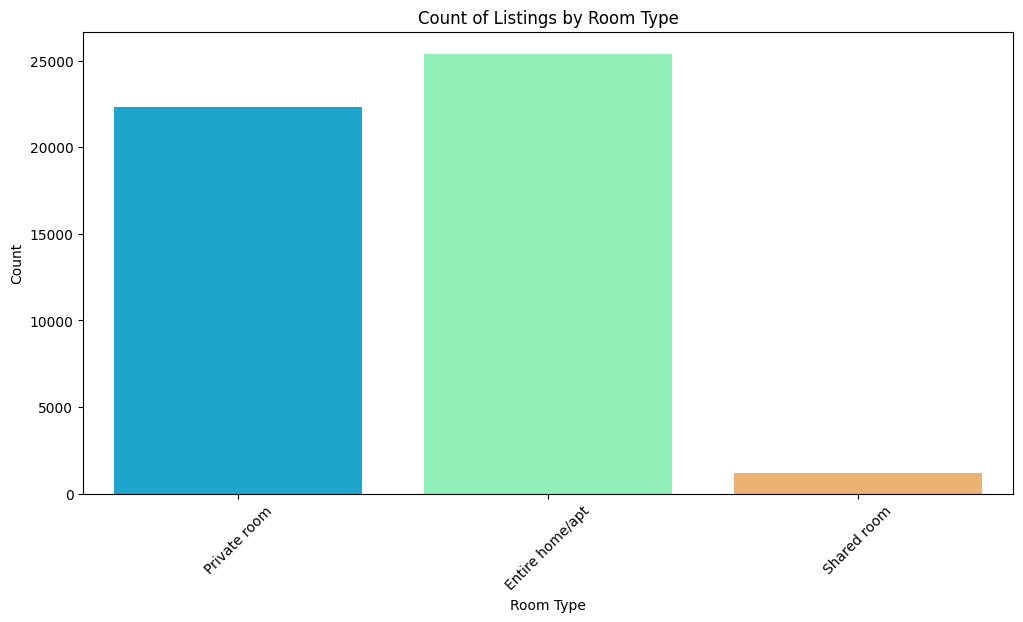

In [13]:
# Count plot

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='neighbourhood_group', palette = 'plasma')
plt.title('Count of Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='room_type', palette= 'rainbow')
plt.title('Count of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

**Piechart**

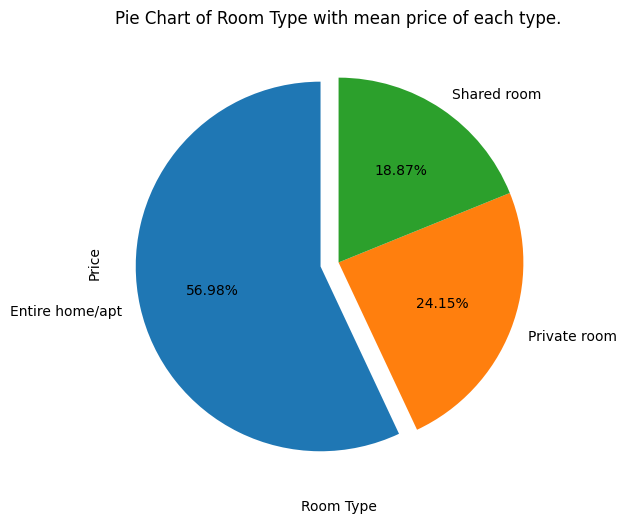

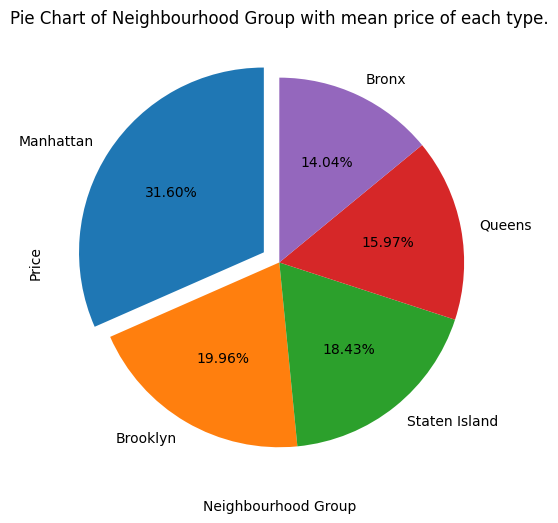

In [14]:
# Pie Chart Distribution

df.groupby('room_type')['price'].mean().sort_values(ascending = False).plot(kind = 'pie' , figsize=(10,6) ,autopct = '%1.2f%%', explode = [0.1,0,0] , startangle = 90)
plt.title("Pie Chart of Room Type with mean price of each type.")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.show()

df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending = False).plot(kind = 'pie' , figsize=(10,6) ,autopct = '%1.2f%%', explode = [0.1,0,0,0,0] , startangle = 90)
plt.title("Pie Chart of Neighbourhood Group with mean price of each type.")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price")
plt.show()

**Barplot**

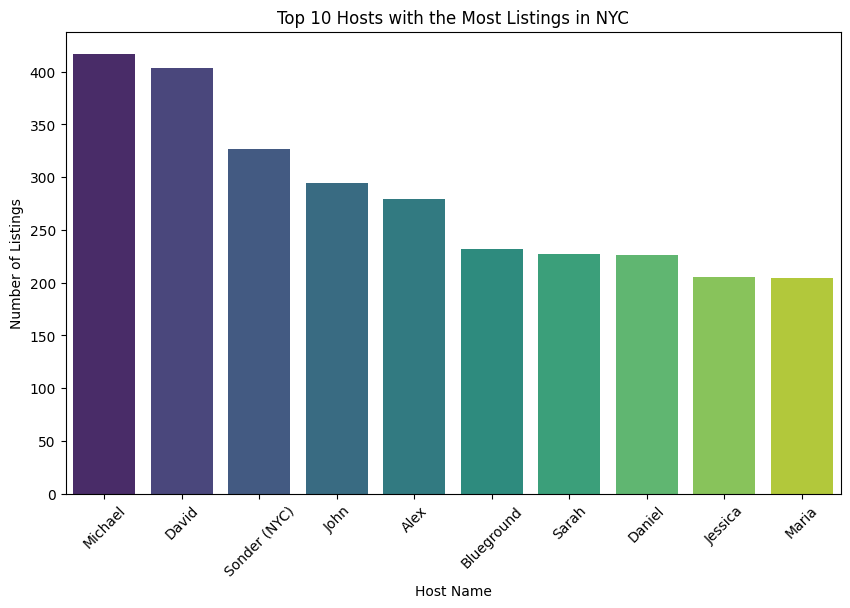

In [15]:
# Host with most listing in NYC

top_hosts = df['host_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_hosts.index, y=top_hosts.values, palette='viridis')
plt.title('Top 10 Hosts with the Most Listings in NYC')
plt.xlabel('Host Name')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

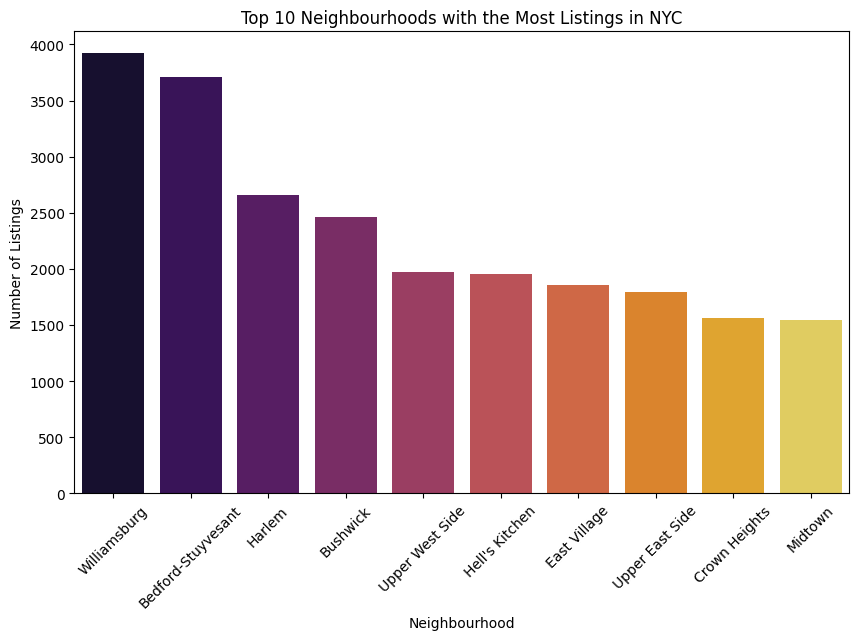

In [16]:
# Top 10 Neighbourhoos with most listings

top_neighbourhoods = df['neighbourhood'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_neighbourhoods.index, y=top_neighbourhoods.values, palette='inferno')
plt.title('Top 10 Neighbourhoods with the Most Listings in NYC')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

**Scatterplot**

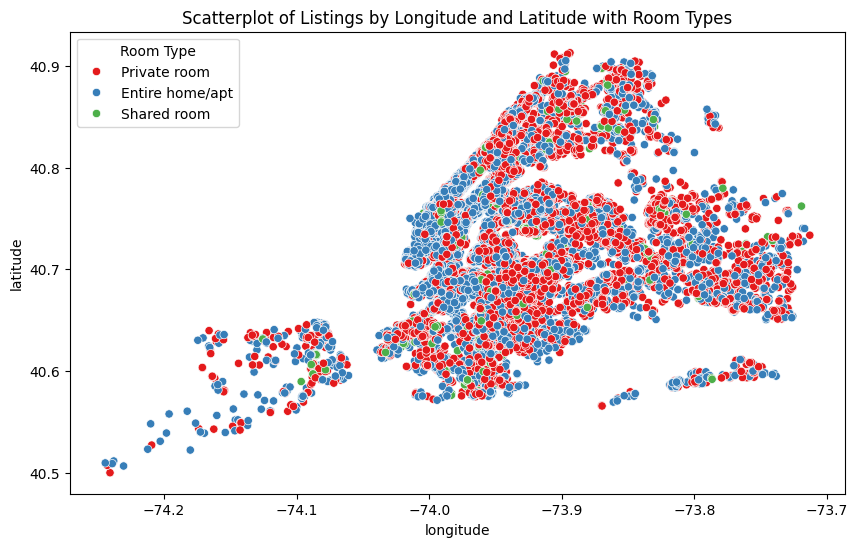

In [17]:
# Scatterplot

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='room_type', palette='Set1')
plt.title('Scatterplot of Listings by Longitude and Latitude with Room Types')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend(title='Room Type')
plt.show()

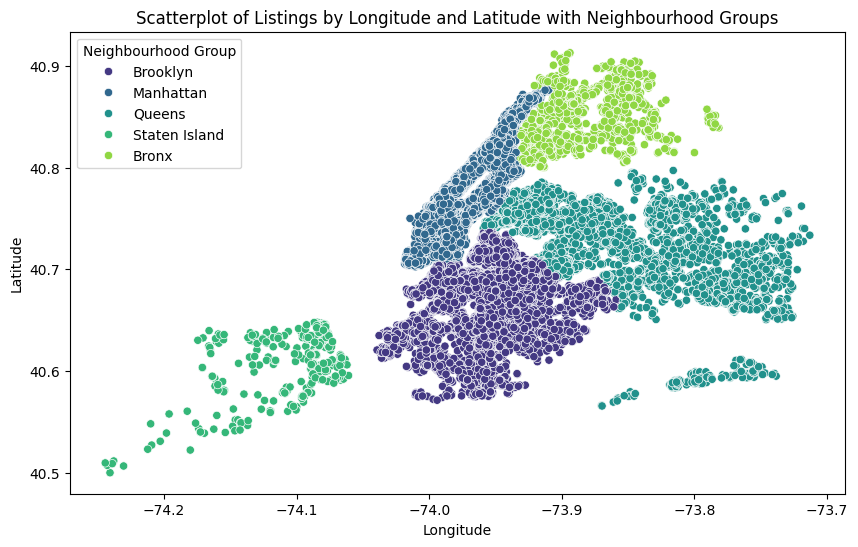

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df, palette='viridis')
plt.title('Scatterplot of Listings by Longitude and Latitude with Neighbourhood Groups')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood Group')
plt.show()

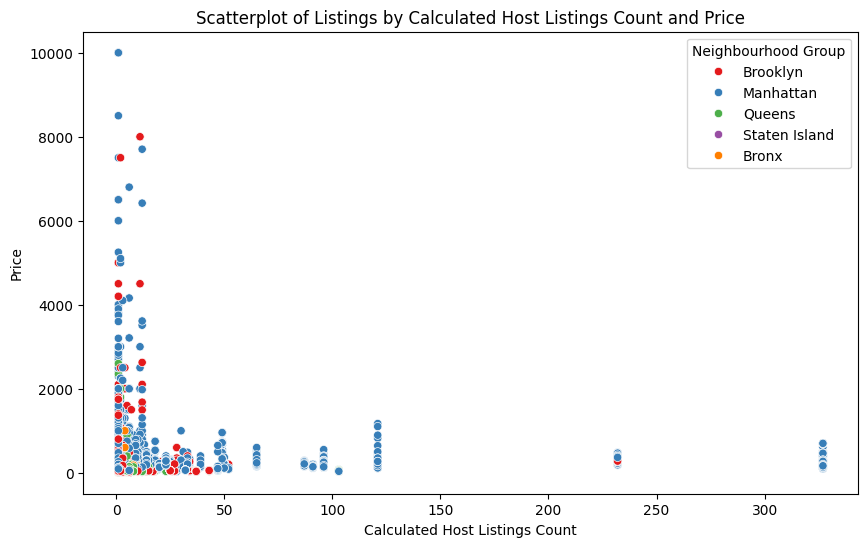

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='calculated_host_listings_count', y='price', hue='neighbourhood_group', palette='Set1')
plt.title('Scatterplot of Listings by Calculated Host Listings Count and Price')
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Price')
plt.legend(title='Neighbourhood Group')
plt.show()

Text(0, 0.5, 'Price')

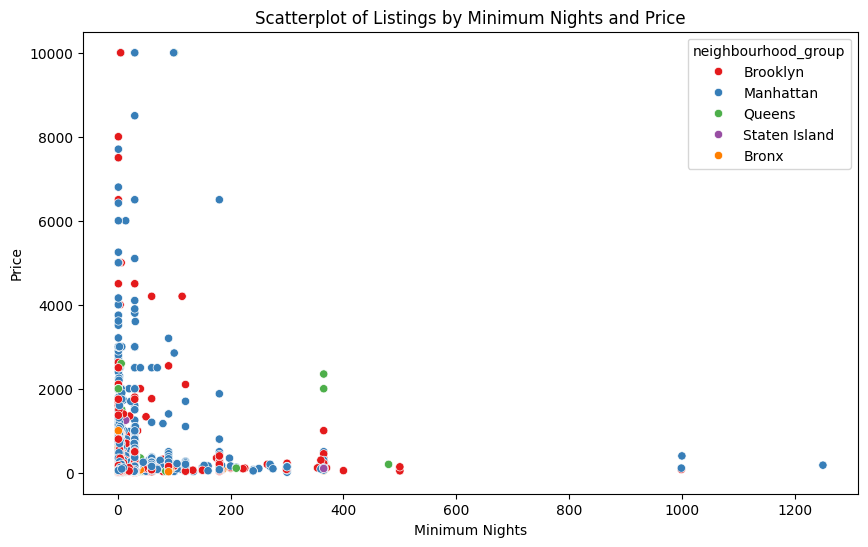

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='minimum_nights', y='price', hue='neighbourhood_group', palette='Set1')
plt.title('Scatterplot of Listings by Minimum Nights and Price')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

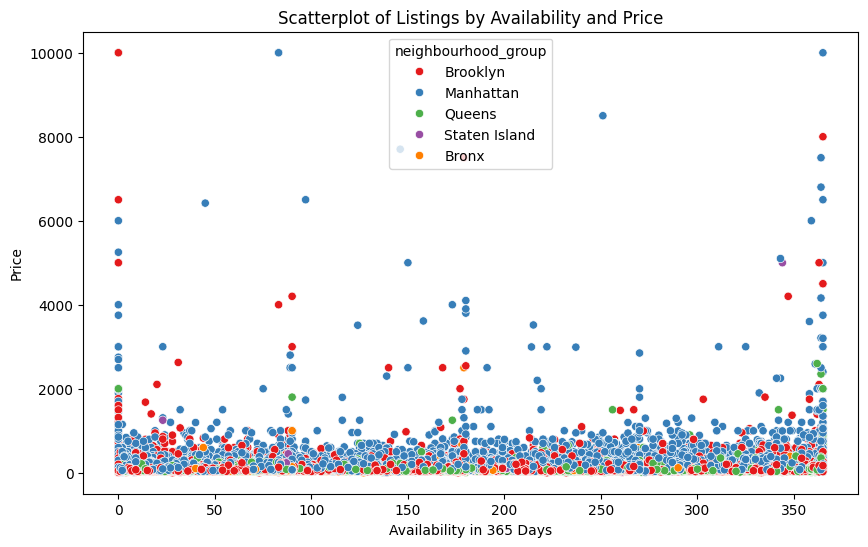

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='availability_365', y='price', hue='neighbourhood_group', palette='Set1')
plt.title('Scatterplot of Listings by Availability and Price')
plt.xlabel('Availability in 365 Days')
plt.ylabel('Price')

**Word Cloud**

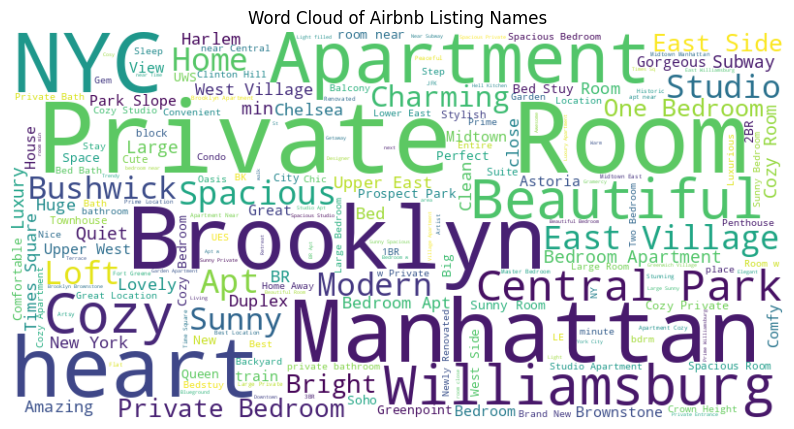

In [22]:
# Word cloud

from wordcloud import WordCloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['name']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Airbnb Listing Names')
plt.show()

**Box Plot**

Text(0, 0.5, 'Price')

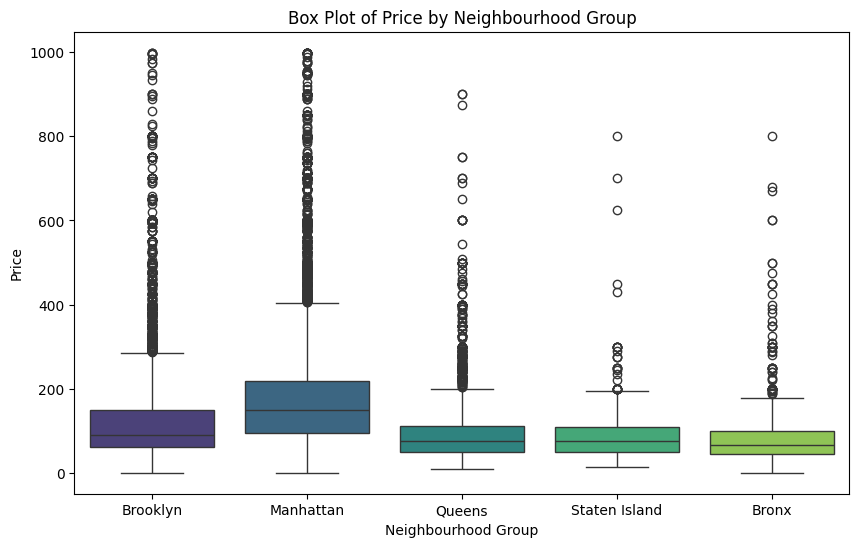

In [23]:
# Taking price < $1000 for Box Plot

df = df[df['price'] < 1000]

plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df, palette='viridis')
plt.title('Box Plot of Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

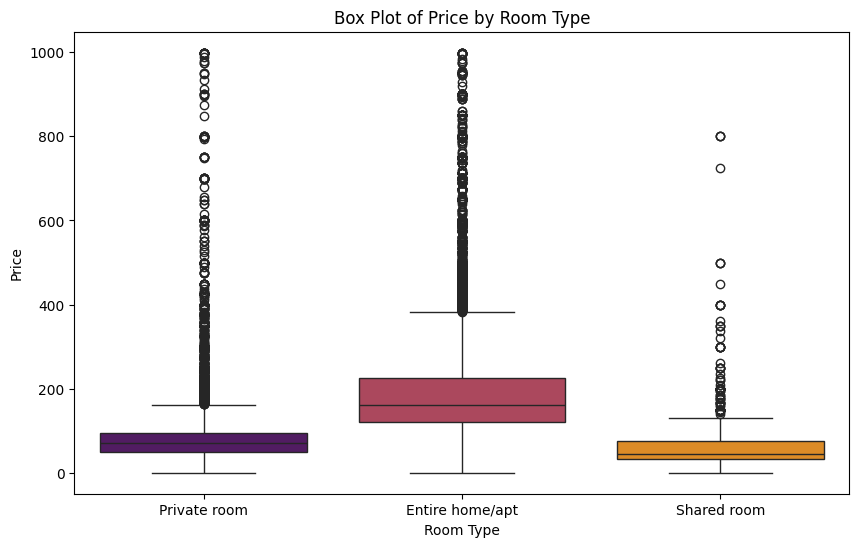

In [24]:
df = df[df['price'] < 1000]

plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df, palette='inferno')
plt.title('Box Plot of Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
#

**END**